In [1]:
import os 
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
from urllib.error import HTTPError


In [4]:
X_full_path = '../data/X_full.npy'

# np.save(X_full_path, X_full)    # .npy extension is added if not given

X_full = np.load(X_full_path)

In [6]:
wavelengths_path = '../data/wavelengths.npy'

# np.save(wavelengths_path, wavelengths)    # .npy extension is added if not given

wavelengths = np.load(wavelengths_path)


In [7]:
X = X_full.copy()

In [8]:
X = X[~np.isnan(X).any(axis=1)]

In [9]:
X.shape

(4853, 2796)

Text(0.5, 1.0, 'Mean Spectrum')

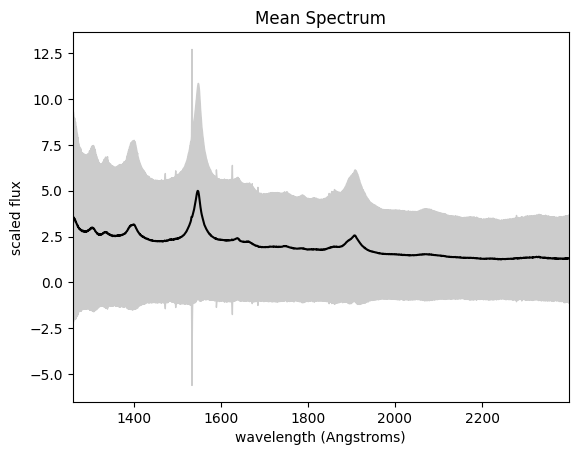

In [10]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# X = preprocessing.normalize(X)
mu = X.mean(0)
std = X.std(0)
plt.plot(wavelengths, mu, color='black')
plt.fill_between(wavelengths, mu - std, mu + std, color='#CCCCCC')
plt.xlim(wavelengths[0], wavelengths[-1])
# plt.ylim(0, 0.06)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux')
plt.title('Mean Spectrum')

In [22]:
from sklearn.decomposition import PCA

X_train = X

pca = PCA(n_components=5, svd_solver='full', random_state=12345)
# pca_mle = PCA(n_components='mle', random_state=1234)

pca.fit(X_train)

PCA(n_components=5, random_state=12345, svd_solver='full')

In [23]:
X_train_pca = pca.transform(X_train)
X_projected = pca.inverse_transform(X_train_pca)
X_reduced = X_train - X_projected

In [24]:
X.shape

(4853, 2796)

Text(0.5, 1.0, 'Mean Spectrum and Eigen-spectra')

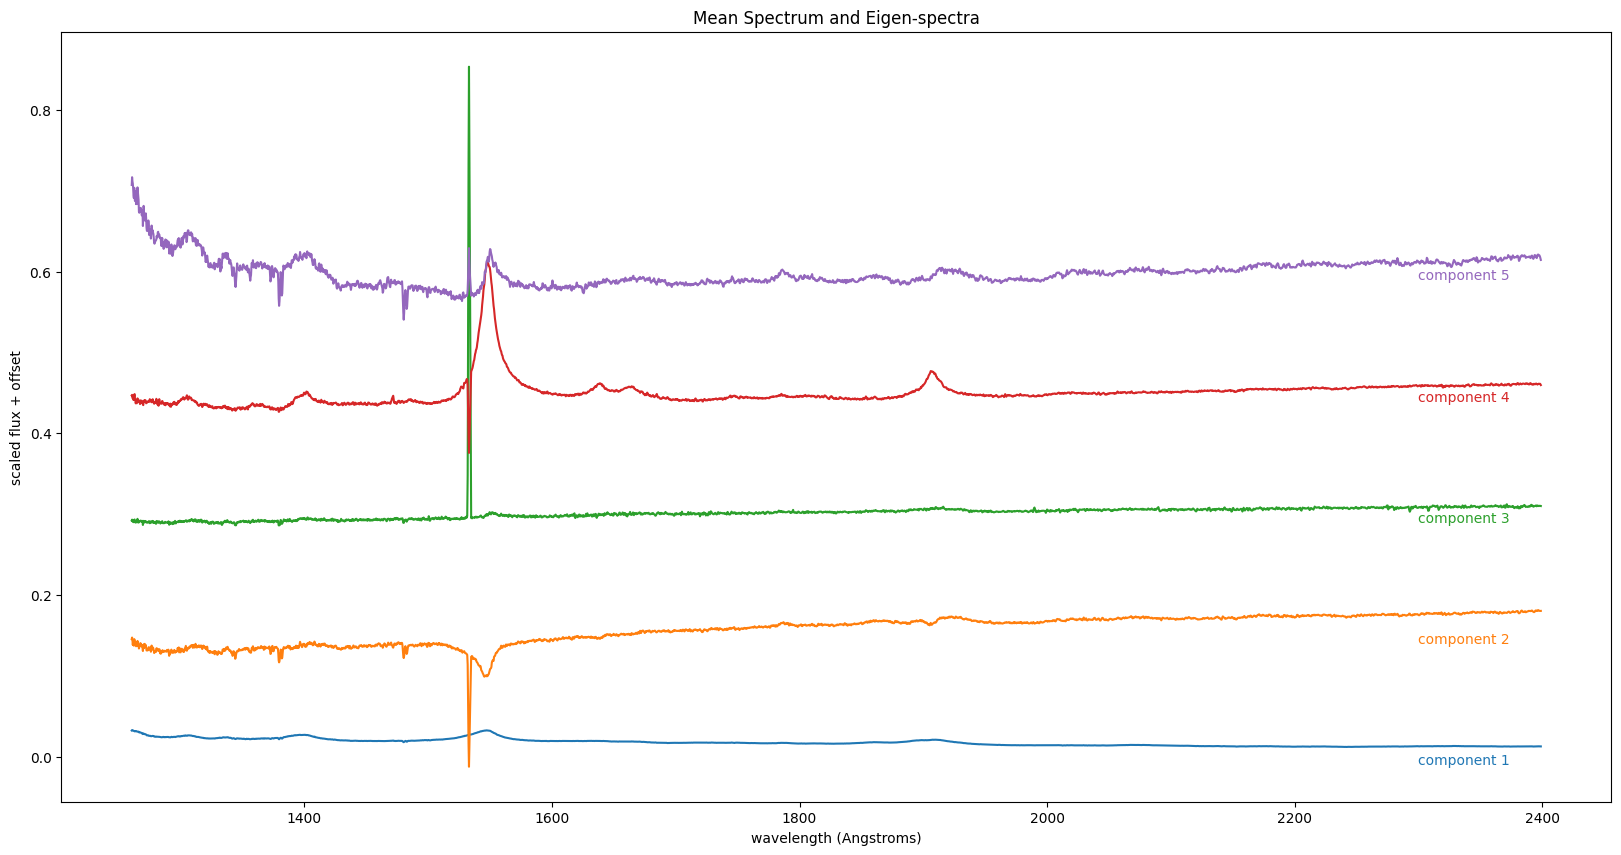

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(5):
    l = ax.plot(wavelengths, pca.components_[i] + 0.15 * i)
    c = l[0].get_color()
    ax.text(2300, -0.01 + 0.15 * i, "component %i" % (i + 1), color=c)
ax.set_xlabel('wavelength (Angstroms)')
ax.set_ylabel('scaled flux + offset')
ax.set_title('Eigen-spectra')

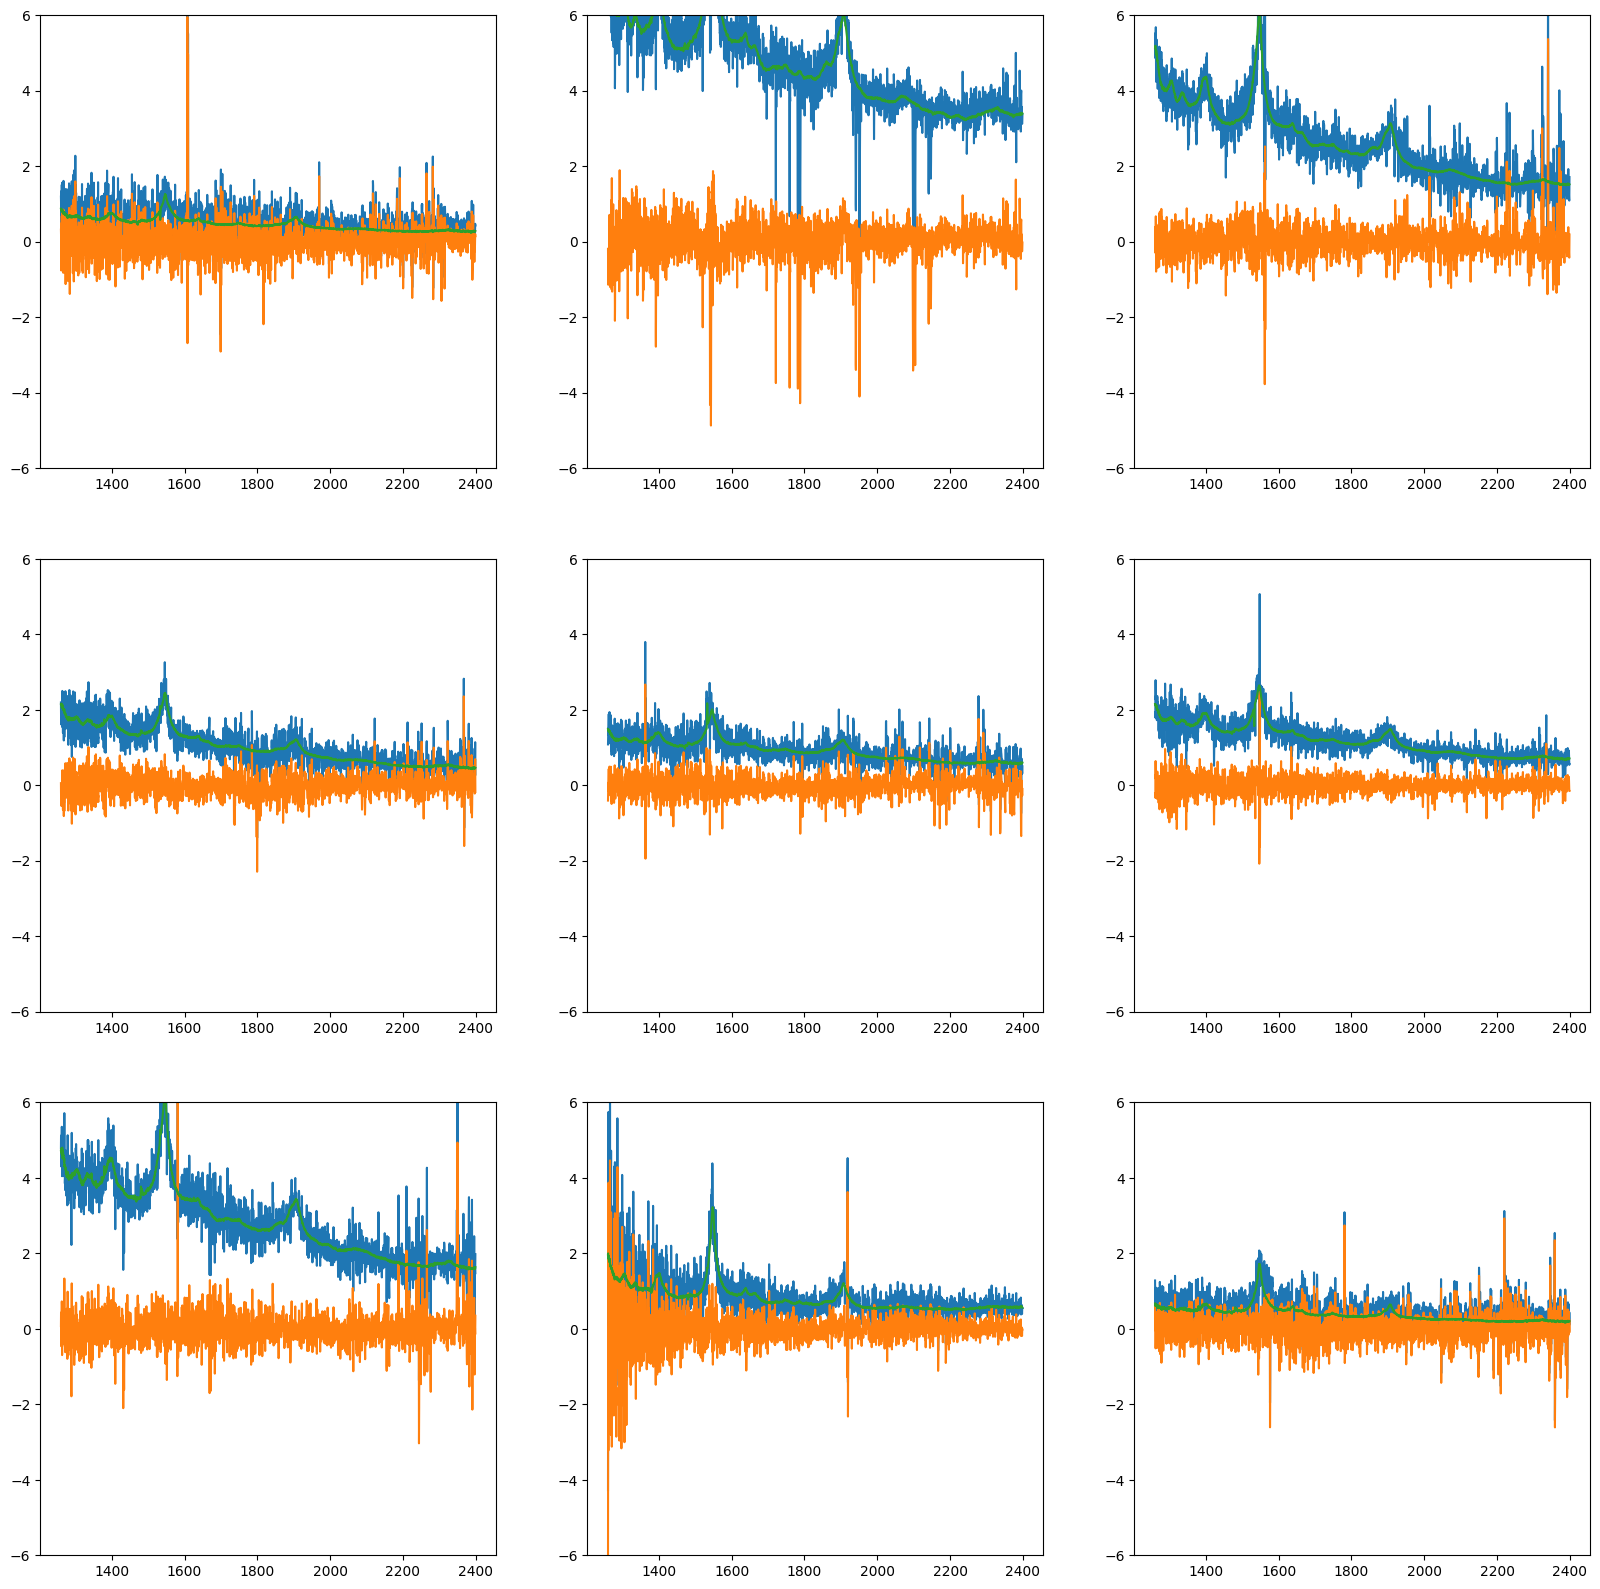

In [43]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
for i in np.arange(0,9):
    ax_i = axs[int(np.floor(i/3)), int(np.mod(i, 3))]
    ax_i.set_ylim(-6,6)
    ax_i.plot(wavelengths, X_train[i])
    ax_i.plot(wavelengths, X_reduced[i])
    ax_i.plot(wavelengths, X_projected[i])


In [40]:
import pickle

# save
with open('pca.pkl','wb') as f:
    pickle.dump(pca,f)

In [44]:
spec

NameError: name 'spec' is not defined